In [47]:
from plotnine import *

In [72]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import pairwise.rbf_kernel

SyntaxError: invalid syntax (<ipython-input-72-cd8a7b12006f>, line 24)

In [69]:
from sklearn.metrics import v_measure_score

In [62]:
from sklearn import metrics

In [34]:
df = pd.read_csv("C:/Users/jugvi/Downloads/Train2.csv")

In [35]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [36]:
df.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [37]:
df.fillna(df.mean(), inplace = True)

<ipython-input-37-af658eae1e37>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [38]:
df.dropna(axis=0, inplace=True)

In [39]:
df.isna().sum(axis=0)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [40]:
mk = LabelEncoder()
df['Gender'] = mk.fit_transform(df['Gender'])
df['Ever_Married'] = mk.fit_transform(df['Ever_Married'])
df['Graduated'] = mk.fit_transform(df['Graduated'])
df['Spending_Score'] = mk.fit_transform(df['Spending_Score'])
df['Var_1'] = mk.fit_transform(df['Var_1'])
df['Profession'] = mk.fit_transform(df['Profession'])
df['Family_Size'] = mk.fit_transform(df['Family_Size'])
df['Work_Experience'] = mk.fit_transform(df['Work_Experience'])

In [41]:
df.drop(['ID'],axis=1,inplace=True)

In [42]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1,2,4,3
1,0,1,38,1,2,3,0,3,3
2,0,1,67,1,2,1,2,0,5
3,1,1,67,1,7,0,1,1,5
4,0,1,40,1,3,3,1,6,5


In [43]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df)

K-Means Clustering

In [44]:
X = df[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']].copy()

In [45]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

In [46]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [171]:
sns.set()

Text(0, 0.5, 'WCSS')

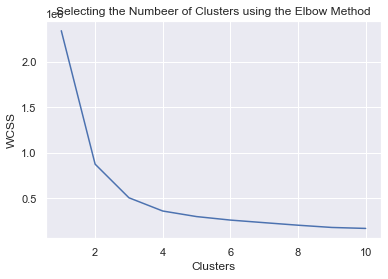

In [172]:
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Here, we can see that the optimum number of clusters is 3 using the elbow method.

Spectral Clustering

In [177]:
# Scaling the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
  
# Normalizing the Data
df_normalized = normalize(df_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
  
df_principal.head()

,P1,P2
0,0.816925,0.541816
1,-0.469847,0.067474
2,-0.436689,-0.620253
3,-0.501720,0.157561
4,-0.211060,0.179028


In [178]:
spectral_model_rbf= SpectralClustering(n_clusters=2, affinity='rbf')

In [179]:
labels_rbf = spectral_model_rbf.fit_predict(df_principal)

In [180]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

In [181]:
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

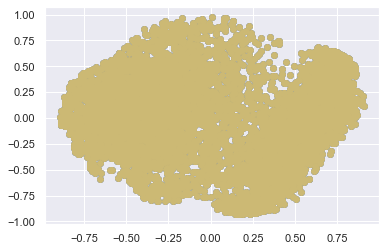

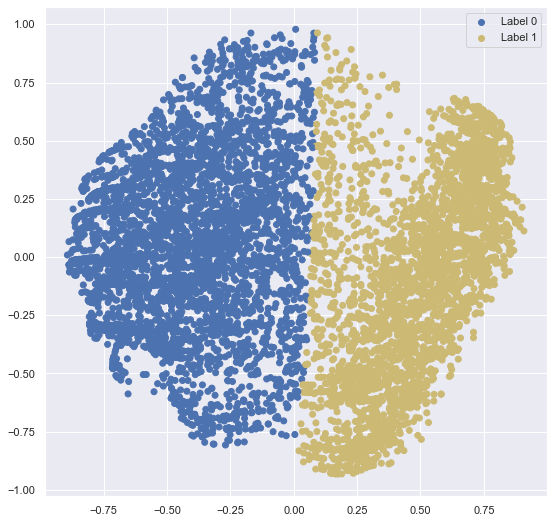

In [183]:
# Plotting the clustered scatter plot
  
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b');
y = plt.scatter(df_principal['P1'], df_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [184]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(df_principal)

In [185]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(df, labels_rbf))
s_scores.append(silhouette_score(df, labels_nn))
  
print(s_scores)

[0.2543258071116826, 0.25827602260393606]


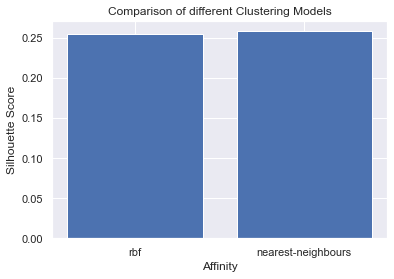

In [186]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

Factor Analysis

In [84]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(11277.588069207144, 0.0)

In [85]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [86]:
kmo_model

0.579410598951944

Since the KMO value is low, it is not preferred to move forward with FA. More samples should be collected.

Gaussian Mixed Models (for 3 dimensions)

In [48]:
features = ['Gender','Age','Spending_Score']

In [49]:
A = df[features]

In [50]:
z = StandardScaler()

In [51]:
A[features] = z.fit_transform(A)

<ipython-input-51-c2be0123610a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
EM = GaussianMixture(n_components = 3)

In [53]:
EM.fit(A)

GaussianMixture(n_components=3)

In [54]:
cluster = EM.predict(A)
cluster

array([2, 0, 1, ..., 1, 1, 0], dtype=int64)

In [55]:
print('Silhouette:',silhouette_score(A,cluster))

Silhouette: 0.4349707551926686


In [56]:
A['cluster']=cluster

<ipython-input-56-70b88bb34d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


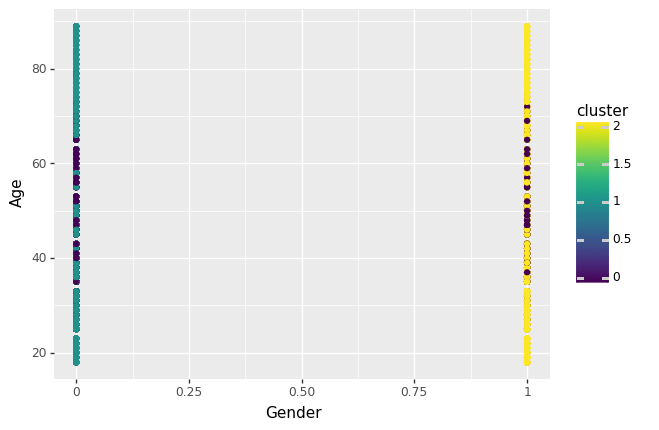

<ggplot: (131939697878)>

In [57]:
(ggplot(X,aes(x='Gender',y='Age',color='cluster'))+geom_point())

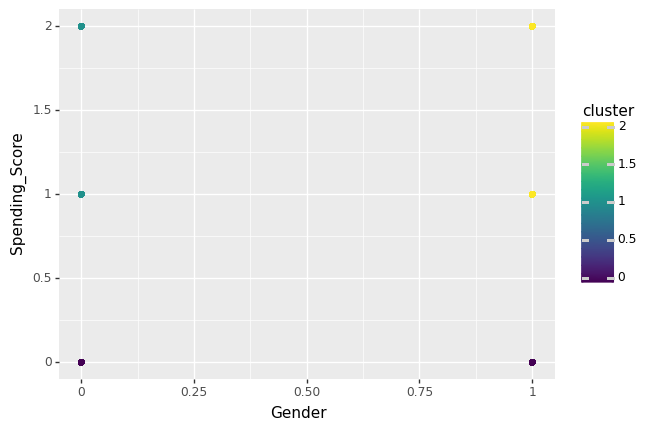

<ggplot: (131941258704)>

In [58]:
(ggplot(X,aes(x='Gender',y='Spending_Score',color='cluster'))+geom_point())

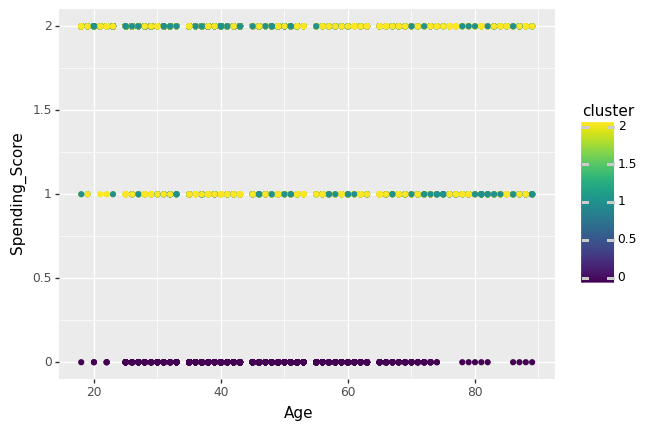

<ggplot: (131940864299)>

In [59]:
(ggplot(X,aes(x='Age',y='Spending_Score',color='cluster'))+geom_point())

Agglomerative Clustering

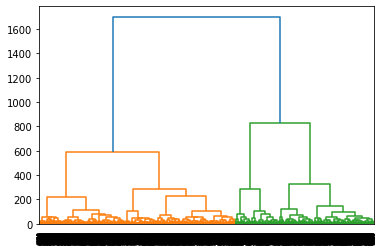

In [61]:
linkage_method = linkage(df, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

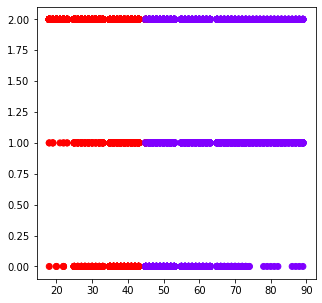

In [68]:
cluster_ea = AgglomerativeClustering(n_clusters=2, linkage='ward',affinity='euclidean')

# Visualizing the clustering
plt.figure(figsize =(5, 5))
plt.scatter(df['Age'],df['Spending_Score'],c = cluster_ea.fit_predict(df),cmap='rainbow')
plt.show()

The next step in this analysis would be to check the data as to why multiple singular line clusters are formed even after using two different clustering algorithms. Checking this and comparing it with other algorithms would yeild optimum number of clusters.